<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supervised-Learning" data-toc-modified-id="Supervised-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supervised Learning</a></span><ul class="toc-item"><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#Sample-Datasets" data-toc-modified-id="Sample-Datasets-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sample Datasets</a></span></li><li><span><a href="#scikit-learn-example" data-toc-modified-id="scikit-learn-example-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>scikit-learn example</a></span></li><li><span><a href="#Multitask-Example" data-toc-modified-id="Multitask-Example-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Multitask Example</a></span></li><li><span><a href="#Kernel-Trick" data-toc-modified-id="Kernel-Trick-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Kernel Trick</a></span></li><li><span><a href="#Activity-1---Kernel-Trick" data-toc-modified-id="Activity-1---Kernel-Trick-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Activity 1 - Kernel Trick</a></span></li></ul></li><li><span><a href="#Artificial-Neural-Networks" data-toc-modified-id="Artificial-Neural-Networks-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Artificial Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Accuracy-vs-Loss" data-toc-modified-id="Accuracy-vs-Loss-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Accuracy vs Loss</a></span></li><li><span><a href="#Problem-Context" data-toc-modified-id="Problem-Context-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Problem Context</a></span></li><li><span><a href="#Activity-2---Calculate-Statistics" data-toc-modified-id="Activity-2---Calculate-Statistics-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Activity 2 - Calculate Statistics</a></span></li><li><span><a href="#Activity-3---Standardize-Data" data-toc-modified-id="Activity-3---Standardize-Data-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Activity 3 - Standardize Data</a></span></li><li><span><a href="#Training-and-Testing-Split" data-toc-modified-id="Training-and-Testing-Split-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Training and Testing Split</a></span></li><li><span><a href="#Single-Layer-Neural-Network" data-toc-modified-id="Single-Layer-Neural-Network-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Single Layer Neural Network</a></span></li><li><span><a href="#Multi-Layer-Perceptron-Model" data-toc-modified-id="Multi-Layer-Perceptron-Model-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Multi-Layer Perceptron Model</a></span></li><li><span><a href="#Activity-4---Compile-a-Multilayer-Perceptron-Model" data-toc-modified-id="Activity-4---Compile-a-Multilayer-Perceptron-Model-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Activity 4 - Compile a Multilayer Perceptron Model</a></span></li></ul></li></ul></li></ul></div>

## Supervised Learning ##
Supervised learning is one of the four common branches of machine learning which is concerned with predicting future observations based on labeled data. In a typical application, we will need to choose the relevant descriptors to provide as input to our model (feature selection), select a model, and decide on an optimal training strategy.

<b>feature selection</b>: this is the process of deciding on the inputs that will be used for training our model. In the most general case, we are seeking a model $f(\mathbf{x})=\mathbf{y}$, where $\mathbf{x}$ is the set of features, and $\mathbf{y}$ is the set of labels we are trying to predict and $f()$ is the model. The choice of x may seem obvious in many cases if we have relevant domain information (e.g., physical laws that underly target phenomena), but in many cases it will be guided by data availability and trial and error. 

<b>model selection</b>: many varieties of supervised learning models exist, each with various strengths and weaknesses. At the highest level, models are differentiated based on if we are interested in classification ($\mathbf{y}$ is a set of discreet labels or classes) or regression ($\mathbf{y}$ is a set of scalar labels). Finding the "best" model is not usually goal, rather just finding "a" model that performs well on this task. Model selection is thus often based on considerations like the ease of training, prior expertise, and demonstrated performance on related tasks with the same domain. 

<b>training</b>: the specific algorithm used for optimization can have an enormous impact on the performance of the final model. Training algorithhms can be specific to the particular model, however, most will build on the concepts that we developed in the optimization lecture (e.g., gradient descent, stochastic, batch, momentum concepts). Finally, data splitting, regularization, and cross-validation are critical tools for reducing overfitting and obtaining good general performance. 

<b>error</b>: In supervised learning, the target property is well defined and provides a clear metric for performance. Typical objective functions will include a penalty related to misclassification or deviation from the label (e.g., mean squared error or absolute difference in the case of regression tasks). 

Supervised learning is the most common branch of machine learning and it underlies many commercial uses of ML. Today we will cover two examples <b>support vector machines</b> and <b>neural networks</b>.

### Support Vector Machines ###
<b>Support vector machines</b> are a common model for supervised classification tasks. After covering the details you will also see on a variation of SVM could be used for unsupervised classification, which provides a nice bridge between the supervised and unsupervised learning lectures. 

The object SVMs is to identify the optimal boundary that separates two or more classes of objects with respect to the descrptors. That is, an SVM, like all supervised classification models attempts to solve the problem $\mathbf{y} = f(\mathbf{x})$ such that given a future x, we predict the correct class y to apply to the observation. In this case, SVM draws a <i>linear</i> boundary between the two classes. That is, if you plot the data classes with respect to <b>x</b>, the SVM solution is represented by the "best" straight line that divides them. The ability to draw such a boundary will clearly depend on your choice of <b>x</b>! 

A few questions that should have arisen if you understood the last paragraph:

1. <b>What if we have more than two classes?</b> It turns out that this problem can be solved by reducing it to several pair-wise classification problems. So understanding the two class case is the correct starting point. 

2. <b>What if the classes overlap?</b> The typical objective function for training SVMs utilizes a "soft" boundary that linearly penalizes observing a label in the wrong region. In this case the "best" line, will still have errors in training. 

3. <b>What if the line separating the classes is not straight?</b> When the best boundary between your classes is anything but a straight line, that means your problem is "non-linear" in your chosen <b>x</b> descriptors. You may be able to find better descriptors that linearize the problem. More likely you are stuck with <b>x</b>. But you may still be able to linearize the boundary using the "kernel trick", which transforms your <b>x</b> into a higher dimension where the problem becomes linear. This is cool stuff, but beyond what we can cover here.   

4. <b>What is a support vector?</b> Since all a SVM is trying to do is find a boundary, it turns out the optimal solution only depends on the samples that are at the edge of the domain. The vectorial positions of these boundary data are the "support vectors" and hence the name of the model. 

#### Sample Datasets ####
We'll use two of the datasets from the unsupervised learning lecture for illustrating the basics of SVMs. Critically we will keep the labels here, instead of hiding them like we did for the unsupervised demonstrations. `data1` will serve as our linearly separable example, `data2` will be the multiclass example, and `data3` will serve as our non-linear example. 


Text(0.5, 1.0, 'non-linear separable')

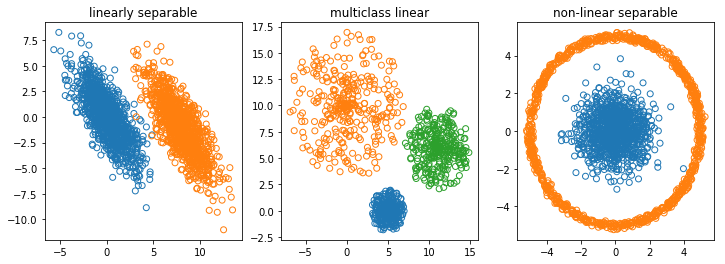

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    for i in range(len(clf.coef_)):
        # get the separating hyperplane
        w = clf.coef_[i]
        a = -w[0] / w[1]
        xx = np.linspace(min_x, max_x)  # make sure the line is long enough
        yy = a * xx - (clf.intercept_[i]) / w[1]
        plt.plot(xx, yy, linestyle, label=label)

# define rotation function for generating datasets
def rotate(a,angle,mode='degree'):
    if len(a.shape) == 1 or a.shape[1] != 2:
        raise ValueError("ERROR in rotate: input matrix must be Nx2")
    if mode == "angle":
        angle = angle*np.pi/180.0
    return np.einsum('...i,ij',a,np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]))

num = 1000
plt.figure(figsize=(12, 4))

# Generate dataset 1 : offset gaussians
a = np.concatenate([np.random.normal(loc=0.0,scale=3.0,size=(num,1)),np.random.normal(loc=0.0,scale=1.0,size=(num,1))],axis=1)
a = rotate(a,45) 
b = np.concatenate([np.random.normal(loc=0.0,scale=3.0,size=(num,1)),np.random.normal(loc=0.0,scale=1.0,size=(num,1))],axis=1)
b = rotate(b,45) + np.array([8.0,-1.0])
data1_X = np.concatenate([a,b],axis=0)
data1_y = np.array([0]*len(a) + [1]*len(b))
plt.subplot(131)
plt.scatter(data1_X[:,0],data1_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(list(data1_y)))
plt.title('linearly separable')

# Generate dataset 2 : blobs with varying density
r = np.random.uniform(low=0.0,high=2.0,size=(int(num/3),1))
theta = np.random.uniform(low=0.0,high=np.pi*2.0,size=(int(num/3),1))
a = np.concatenate([r*np.cos(theta),r*np.sin(theta)],axis=1) + np.array([5.0,0])
r = np.random.uniform(low=0.0,high=7.0,size=(int(num/3),1))
theta = np.random.uniform(low=0.0,high=np.pi*2.0,size=(int(num/3),1))
b = np.concatenate([r*np.cos(theta),r*np.sin(theta)],axis=1) + np.array([0.0,10.0])
r = np.random.uniform(low=0.0,high=4.0,size=(int(num/3),1))
theta = np.random.uniform(low=0.0,high=np.pi*2.0,size=(int(num/3),1))
c = np.concatenate([r*np.cos(theta),r*np.sin(theta)],axis=1) + np.array([11.0,6.0])
data2_X = np.concatenate([a,b,c],axis=0)
data2_y = np.array([0]*len(a) + [1]*len(b) + [2]*len(c))
plt.subplot(132)
plt.scatter(data2_X[:,0],data2_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(list(data2_y)))
plt.title('multiclass linear')

# Generate dataset 2 : ring with bullseye
a = np.concatenate([np.random.normal(loc=0.0,scale=1.0,size=(num,1)),np.random.normal(loc=0.0,scale=1.0,size=(num,1))],axis=1)
r = np.random.normal(loc=5.0,scale=0.1,size=(num,1))
theta = np.random.uniform(low=0.0,high=np.pi*2.0,size=(num,1))
b = np.concatenate([r*np.cos(theta),r*np.sin(theta)],axis=1)
data3_X = np.concatenate([a,b],axis=0)
data3_y = np.array([0]*len(a) + [1]*len(b))
plt.subplot(133)
plt.scatter(data3_X[:,0],data3_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(list(data3_y)))
plt.title('non-linear separable')

#### scikit-learn example ###
The cell below demonstrates how to use the scikit-learn `SVC` object to perform linear classification:

Text(0.5, 1.0, 'SVM Prediction')

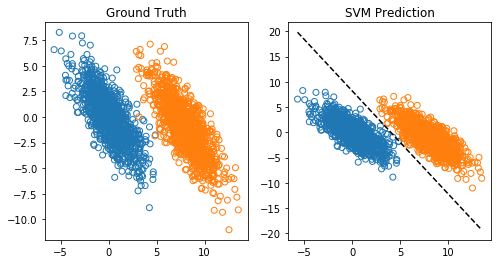

In [3]:
from sklearn.svm import SVC

# Initialize SVM model and fit
model = SVC(kernel='linear')
model.fit(data1_X,data1_y)

# Plot original data with labels
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(data1_X[:,0],data1_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(list(data1_y)))
plt.title('Ground Truth')

# Plot SVM predictions
plt.subplot(122)
plt.scatter(data1_X[:,0],data1_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(model.predict(data1_X)))
plot_hyperplane(model, min(data1_X[:,0]), max(data1_X[:,0]), 'k--','Boundary\nfor class 1')
plt.title('SVM Prediction')

#### Multitask Example ####
In scikit learn training SVMs for multitask assignment is almost identical to the two class case:

Text(0.5, 1.0, 'SVM Prediction')

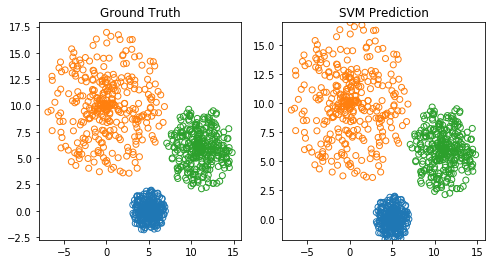

In [4]:
from sklearn.svm import SVC

# Initialize SVM model and fit
model = SVC(kernel='linear')
model.fit(data2_X,data2_y)

# Plot original data with labels
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(data2_X[:,0],data2_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(list(data2_y)))
plt.title('Ground Truth')

# Plot SVM predictions
plt.subplot(122)
plt.scatter(data2_X[:,0],data2_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(model.predict(data2_X)))
plt.ylim(min(data2_X[:,1]),max(data2_X[:,1]))
plt.title('SVM Prediction')

<b>Note:</b> It is messy to try and draw the boundaries so that they don't overlap. 

#### Kernel Trick ####
The so-called "kernel trick" is used for linearizing non-linear problems. In simple terms this let's you determine curved boundaries with SVMs. In principle these are very expensive to calculate, but by applying the transform virtually (via the kernel) these curved boundaries can be calculated very effectively. The results will depend on the specific Kernel that you use. 

#### Activity 1 - Kernel Trick ####
In the cell below I have written the code for performing a linear prediction of the classification task on our "bullseye" dataset. It doesn't work very well (as we expect). 

1. Look up the documentation for the ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ kernel options. 
2. Make a subplot with the best result for each.
3. Answer the questions below.

In [ ]:
from sklearn.svm import SVC

# Plot original data with labels
plt.figure(figsize=(4, 8))
plt.subplot(321)
plt.scatter(data3_X[:,0],data3_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(list(data3_y)))
plt.title('Ground Truth')

# Plot results with linear kernel
model = SVC(kernel='linear')
model.fit(data3_X,data3_y)
plt.subplot(322)
plt.scatter(data3_X[:,0],data3_X[:,1],facecolor='None',marker='o',edgecolors=cm.tab10(model.predict(data3_X)))
plt.title('linear')


<b>Q1</b>: Which kernel works best at separating the data?

<b>Q2</b>: Did you notice a difference in the run time for the non-linear kernels?

### Artificial Neural Networks ###
The fundamental unit in a neural network is the "artificial neuron". These artificial neurons are the mathematical analog of their biological counterparts. These neurons link to other neurons, and "fire" depending on if their inputs rise above a certain threshold. A neural network can be made up of thousands of thes neurons connected in different ways to one another. The basic parameters in these models are associated with the weights for each neural connection (i.e., a scalar that scales the connection between a given pair of neurons), and the bias of the activation function (i.e., the threshhold necessary to switch the neuron). 

In neural network models there is a direct mapping between features via the input layer and labels via the output layer. Contrast this with the case of  support vector machines, where the model only fit a boundary, then predictions were based on which side of the boundary they resided. Any additional layers that are included between the input and output layers are referred to as "hidden" (partly because they are not easily interpretable). Models with hidden layers are called "deep", and their unique proficiency in mapping complex relationships has created the special term "deep learning". Although neural networks can in principle be arranged in any network structure, implementation is aided by some common architectures that have emerged (e.g., feed-forward and convolutional networks).

Sufficently large neural networks can approximate any function. The compelling idea behind a lot of deep learning is that neural networks can learn "f(x)=y" mappings for models that are intrinsically too complex for direct physical modeling. The thinking goes that since deep neural networks can approximate anything, then with enough data they should be able to tame these otherwise intractable phenomena. Conversely, the complexity of deep models make them difficult to train, which was historically why research on them waned. Deep neural networks are also firmly in culture 2 (if you think back to the first lecture)--they are not easily interpretable, but are trained for their brute predictive power. 

Several specialized libraries have emerged to support the development of neural network based models. Here we will be using the `Keras` python API with a `tensorflow` backend.

#### Accuracy vs Loss ####
As objective functions become more complex, we will want to distinguish between the value of the objective function and the performance on the desired prediction task. Specifically we have the following definitions:

<b>loss</b>: this is the value of the objective function that our training algorithm is trying to minimize.
 
<b>accuracy</b>: this is the accuracy of the model in the prediction task that we really care about (e.g., MSE).

It can be counterintuitive at first, but these two aren't as tightly coupled as you might expect. For instance, even in regression we started adding regularization terms to the objective function which made it difficult to interpret. 

#### Problem Context ####
You work as a quality engineer for a company that builds pumps for industrial applications. As part of your job, you perform failure testing in order to determine if the pumps that are produced are in or out of specifications. However, this testing is a destructive process, and in an effort to increase the cost savings you wonder if there is a better method for quality control.

At your disposal is a dataset consisting of measurements taken on 150 different pumps as part of quality control testing, as well as the result of the testing process. Is it possible to utilize machine learning to leverage this data and provide accurate failure predictions?

In the cell below we will 'load' the data. Afterward we will work through step by step how to analyze and prepare our data, train our model, and evaluate its performance.

In [ ]:
#Assign labels. Within the data set, an 'F' denotes a failed test, 'R' denotes that the pump did not pass, but
# is within acceptable parameters to rework, and 'P' denotes a pass. These character labels should be converted
# To numerical labels for analysis
label_dictionary = {
        'F':0,
        'R':1,
        'P':2
        }
# Labels for training
labels = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Header from data file
feature_names = ['Inlet_Diameter_(cm)', 'Maximum_Capacity_(GPM)', 'Max_Head_(ft)', 'Minimum_Thickness_(mm)']

# Features for training
features = np.array([[1.49294237e+01, 1.46485827e+04, 5.40786540e+02, 1.03588953e+01],
       [1.52110070e+01, 1.46105048e+04, 5.41758763e+02, 1.07892499e+01],
       [1.51797859e+01, 1.47936069e+04, 5.41575416e+02, 1.08169441e+01],
       [1.50998006e+01, 1.47053642e+04, 5.41606790e+02, 1.00552675e+01],
       [1.52711539e+01, 1.47605830e+04, 5.42322036e+02, 1.07700593e+01],
       [1.50007690e+01, 1.46328902e+04, 5.40698414e+02, 1.05852588e+01],
       [1.49888734e+01, 1.47501639e+04, 5.41604132e+02, 1.05654339e+01],
       [1.48037692e+01, 1.47767569e+04, 5.39671908e+02, 1.01812552e+01],
       [1.52844832e+01, 1.47011320e+04, 5.41165767e+02, 1.09267766e+01],
       [1.49356039e+01, 1.46764141e+04, 5.41277126e+02, 1.06345955e+01],
       [1.50683025e+01, 1.47563003e+04, 5.39969814e+02, 1.03107255e+01],
       [1.50955711e+01, 1.47519119e+04, 5.41642498e+02, 1.04322609e+01],
       [1.48316399e+01, 1.46416327e+04, 5.40084196e+02, 1.05735035e+01],
       [1.49815810e+01, 1.47744670e+04, 5.41066520e+02, 1.03419338e+01],
       [1.50350327e+01, 1.46848875e+04, 5.41872743e+02, 1.01443330e+01],
       [1.52271890e+01, 1.47801308e+04, 5.42340634e+02, 1.06864723e+01],
       [1.52925906e+01, 1.46768082e+04, 5.41956920e+02, 1.01736169e+01],
       [1.50720883e+01, 1.46641461e+04, 5.39369207e+02, 1.09535948e+01],
       [1.48743229e+01, 1.46179145e+04, 5.41180270e+02, 1.03656746e+01],
       [1.49116879e+01, 1.47141404e+04, 5.41478298e+02, 1.05692798e+01],
       [1.51193910e+01, 1.46823009e+04, 5.44031869e+02, 1.09983749e+01],
       [1.52562689e+01, 1.47040061e+04, 5.40396586e+02, 1.10561357e+01],
       [1.52665351e+01, 1.46050704e+04, 5.41813327e+02, 1.04999863e+01],
       [1.50082082e+01, 1.46408878e+04, 5.40620521e+02, 1.06603158e+01],
       [1.48952904e+01, 1.46888742e+04, 5.40832453e+02, 1.08606492e+01],
       [1.52895126e+01, 1.47428476e+04, 5.41626205e+02, 1.08314814e+01],
       [1.52512032e+01, 1.47285120e+04, 5.41190320e+02, 1.02782749e+01],
       [1.49541007e+01, 1.46277535e+04, 5.41898774e+02, 1.08652613e+01],
       [1.50859972e+01, 1.46646990e+04, 5.42959574e+02, 1.01374391e+01],
       [1.49802587e+01, 1.47993605e+04, 5.39994983e+02, 1.04575020e+01],
       [1.51540162e+01, 1.47941445e+04, 5.39836783e+02, 9.99357452e+00],
       [1.49260958e+01, 1.46904811e+04, 5.40053772e+02, 1.08106140e+01],
       [1.50179044e+01, 1.46662678e+04, 5.40181233e+02, 1.01543684e+01],
       [1.52445088e+01, 1.47054742e+04, 5.42204198e+02, 1.06671390e+01],
       [1.49400209e+01, 1.46820617e+04, 5.41976099e+02, 1.06942023e+01],
       [1.50739658e+01, 1.47272691e+04, 5.43259073e+02, 1.05891244e+01],
       [1.51952704e+01, 1.46705217e+04, 5.41258046e+02, 1.08992419e+01],
       [1.51155239e+01, 1.46183182e+04, 5.40589340e+02, 1.07193193e+01],
       [1.52927337e+01, 1.47050783e+04, 5.40749865e+02, 1.01345310e+01],
       [1.52117965e+01, 1.47672277e+04, 5.41753217e+02, 1.03185491e+01],
       [1.50074012e+01, 1.46111319e+04, 5.41882749e+02, 1.01645967e+01],
       [1.50815349e+01, 1.46153304e+04, 5.42092056e+02, 1.10078466e+01],
       [1.49310184e+01, 1.47164392e+04, 5.40410056e+02, 1.04852421e+01],
       [1.49957044e+01, 1.46852372e+04, 5.40872956e+02, 1.07066791e+01],
       [1.49309742e+01, 1.47285768e+04, 5.41089045e+02, 1.02346822e+01],
       [1.52267390e+01, 1.46037342e+04, 5.41678641e+02, 1.02343190e+01],
       [1.49270075e+01, 1.46171384e+04, 5.40888769e+02, 1.00871755e+01],
       [1.49869649e+01, 1.46692791e+04, 5.42294016e+02, 1.04040087e+01],
       [1.48871248e+01, 1.46951364e+04, 5.40968990e+02, 1.01353217e+01],
       [1.49206406e+01, 1.47630399e+04, 5.41729207e+02, 1.02458802e+01],
       [1.56000000e+01, 1.46485827e+04, 5.44974935e+02, 1.02675753e+01],
       [1.55951340e+01, 1.46383395e+04, 5.44363947e+02, 1.06367378e+01],
       [1.55806309e+01, 1.48487344e+04, 5.44924542e+02, 1.04196127e+01],
       [1.55567727e+01, 1.47867115e+04, 5.42145527e+02, 1.02501079e+01],
       [1.55240240e+01, 1.48665669e+04, 5.43641945e+02, 1.08316069e+01],
       [1.54830222e+01, 1.47614477e+04, 5.43776271e+02, 1.08033577e+01],
       [1.54345653e+01, 1.48987929e+04, 5.42005529e+02, 1.00580372e+01],
       [1.53795964e+01, 1.49425644e+04, 5.42898571e+02, 1.05465001e+01],
       [1.53191856e+01, 1.48808908e+04, 5.42354579e+02, 1.06436559e+01],
       [1.52545085e+01, 1.48666254e+04, 5.46154856e+02, 1.12568786e+01],
       [1.51868241e+01, 1.49532618e+04, 5.43692321e+02, 1.03447521e+01],
       [1.51174498e+01, 1.49517901e+04, 5.42846289e+02, 1.10206135e+01],
       [1.50477358e+01, 1.48405370e+04, 5.44437754e+02, 1.08337547e+01],
       [1.49790391e+01, 1.49685261e+04, 5.42956681e+02, 1.03241793e+01],
       [1.49126967e+01, 1.48703242e+04, 5.45433593e+02, 1.05064936e+01],
       [1.48500000e+01, 1.49533359e+04, 5.44787049e+02, 1.05434166e+01],
       [1.47921693e+01, 1.48344103e+04, 5.42165454e+02, 1.03094809e+01],
       [1.47403301e+01, 1.48030778e+04, 5.45365671e+02, 1.14134322e+01],
       [1.46954915e+01, 1.47354715e+04, 5.45736692e+02, 1.10259704e+01],
       [1.46585262e+01, 1.48080347e+04, 5.42593898e+02, 1.07774964e+01],
       [1.46301537e+01, 1.47507049e+04, 5.45228717e+02, 1.10140363e+01],
       [1.46109262e+01, 1.47455885e+04, 5.43426116e+02, 9.97224289e+00],
       [1.46012180e+01, 1.46190217e+04, 5.42912972e+02, 1.14279638e+01],
       [1.46012180e+01, 1.46269365e+04, 5.43555461e+02, 1.09229292e+01],
       [1.46109262e+01, 1.46472919e+04, 5.43529047e+02, 1.04999589e+01],
       [1.46301537e+01, 1.46744436e+04, 5.42179151e+02, 1.07190177e+01],
       [1.46585262e+01, 1.46346177e+04, 5.43472998e+02, 1.10548835e+01],
       [1.46954915e+01, 1.45101964e+04, 5.42631715e+02, 1.06486569e+01],
       [1.47403301e+01, 1.45257674e+04, 5.45071936e+02, 1.05888260e+01],
       [1.47921693e+01, 1.46417584e+04, 5.41762984e+02, 1.13256538e+01],
       [1.48500000e+01, 1.46209394e+04, 5.44012352e+02, 1.10144238e+01],
       [1.49126967e+01, 1.45050443e+04, 5.44648003e+02, 1.06963683e+01],
       [1.49790391e+01, 1.44722087e+04, 5.44667501e+02, 1.03442777e+01],
       [1.50477358e+01, 1.45065699e+04, 5.42908411e+02, 1.04962226e+01],
       [1.51174498e+01, 1.44821835e+04, 5.42462141e+02, 1.09038054e+01],
       [1.51868241e+01, 1.45303075e+04, 5.45491148e+02, 1.11259508e+01],
       [1.52545085e+01, 1.44803104e+04, 5.44897319e+02, 1.02512036e+01],
       [1.53191856e+01, 1.44385594e+04, 5.43487277e+02, 1.04138224e+01],
       [1.53795964e+01, 1.45392707e+04, 5.44052086e+02, 1.08421686e+01],
       [1.54345653e+01, 1.46185987e+04, 5.43555352e+02, 1.08491718e+01],
       [1.54830222e+01, 1.44825744e+04, 5.44469747e+02, 1.05949680e+01],
       [1.55240240e+01, 1.45093466e+04, 5.44905095e+02, 1.10082794e+01],
       [1.55567727e+01, 1.46350919e+04, 5.42625270e+02, 1.00753356e+01],
       [1.55806309e+01, 1.46301097e+04, 5.45507328e+02, 1.07341406e+01],
       [1.55951340e+01, 1.47007422e+04, 5.45614282e+02, 1.03040811e+01],
       [1.56000000e+01, 1.46037342e+04, 5.44768621e+02, 1.05452114e+01],
       [1.55951340e+01, 1.46449731e+04, 5.43176533e+02, 1.05742695e+01],
       [1.55806309e+01, 1.47244065e+04, 5.44000104e+02, 1.02201274e+01],
       [1.55567727e+01, 1.47764837e+04, 5.45787080e+02, 1.02967765e+01],
       [1.55240240e+01, 1.48690237e+04, 5.43342996e+02, 1.02342175e+01],
       [1.61000000e+01, 1.46485827e+04, 5.43294753e+02, 1.04161714e+01],
       [1.60902681e+01, 1.46661741e+04, 5.42665717e+02, 9.93480523e+00],
       [1.60612617e+01, 1.49038618e+04, 5.44155016e+02, 9.44332529e+00],
       [1.60135455e+01, 1.48680589e+04, 5.42813514e+02, 1.00661382e+01],
       [1.59480481e+01, 1.49725507e+04, 5.43903211e+02, 1.03615498e+01],
       [1.58660444e+01, 1.48900053e+04, 5.44643377e+02, 9.63154548e+00],
       [1.57691306e+01, 1.50474219e+04, 5.44330731e+02, 9.65368258e+00],
       [1.56591929e+01, 1.51083719e+04, 5.44114569e+02, 1.02770024e+01],
       [1.55383711e+01, 1.50606496e+04, 5.43191949e+02, 9.27358796e+00],
       [1.54090170e+01, 1.50568367e+04, 5.42906048e+02, 1.00037360e+01],
       [1.52736482e+01, 1.51502234e+04, 5.43528503e+02, 9.50283823e+00],
       [1.51348995e+01, 1.51516683e+04, 5.42669115e+02, 9.61146069e+00],
       [1.49954715e+01, 1.50394414e+04, 5.42563142e+02, 1.03405488e+01],
       [1.48580781e+01, 1.51625853e+04, 5.43699521e+02, 9.54049328e+00],
       [1.47253934e+01, 1.50557610e+04, 5.42759901e+02, 9.71336928e+00],
       [1.46000000e+01, 1.51265410e+04, 5.43647019e+02, 1.04355626e+01],
       [1.44843385e+01, 1.49920125e+04, 5.43525219e+02, 1.04647322e+01],
       [1.43806602e+01, 1.49420095e+04, 5.43455833e+02, 9.89869694e+00],
       [1.42909830e+01, 1.48530286e+04, 5.44636780e+02, 9.71151576e+00],
       [1.42170524e+01, 1.49019291e+04, 5.43758577e+02, 9.93277603e+00],
       [1.41603074e+01, 1.48191089e+04, 5.44258697e+02, 9.77094341e+00],
       [1.41218524e+01, 1.47871708e+04, 5.44687228e+02, 9.75059692e+00],
       [1.41024360e+01, 1.46329730e+04, 5.43621552e+02, 9.69097771e+00],
       [1.41024360e+01, 1.46129852e+04, 5.44451536e+02, 9.47043982e+00],
       [1.41218524e+01, 1.46057095e+04, 5.43327551e+02, 9.79161186e+00],
       [1.41603074e+01, 1.46060396e+04, 5.43961546e+02, 1.00952415e+01],
       [1.42170524e+01, 1.45407234e+04, 5.45099808e+02, 9.42235098e+00],
       [1.42909830e+01, 1.43926393e+04, 5.43068004e+02, 1.03918870e+01],
       [1.43806602e+01, 1.43868357e+04, 5.44230236e+02, 1.01482147e+01],
       [1.44843385e+01, 1.44841562e+04, 5.44289790e+02, 9.57912124e+00],
       [1.46000000e+01, 1.44477343e+04, 5.42941626e+02, 9.91300524e+00],
       [1.47253934e+01, 1.43196075e+04, 5.43396818e+02, 9.52230783e+00],
       [1.48580781e+01, 1.42781495e+04, 5.44060053e+02, 9.85967698e+00],
       [1.49954715e+01, 1.43076655e+04, 5.42501903e+02, 1.02991662e+01],
       [1.51348995e+01, 1.42823054e+04, 5.42209322e+02, 9.53557134e+00],
       [1.52736482e+01, 1.43333460e+04, 5.42795028e+02, 9.57609245e+00],
       [1.54090170e+01, 1.42900991e+04, 5.44403347e+02, 1.02943640e+01],
       [1.55383711e+01, 1.42588006e+04, 5.42163396e+02, 9.37225218e+00],
       [1.56591929e+01, 1.43734632e+04, 5.42481055e+02, 9.48220760e+00],
       [1.57691306e+01, 1.44699697e+04, 5.42675511e+02, 9.80001904e+00],
       [1.58660444e+01, 1.43540169e+04, 5.43575287e+02, 9.76913828e+00],
       [1.59480481e+01, 1.44033627e+04, 5.43930608e+02, 1.01923898e+01],
       [1.60135455e+01, 1.45537446e+04, 5.43987288e+02, 9.95963060e+00],
       [1.60612617e+01, 1.45749822e+04, 5.44418403e+02, 9.81232605e+00],
       [1.60902681e+01, 1.46729075e+04, 5.45039372e+02, 1.00734965e+01],
       [1.61000000e+01, 1.46037342e+04, 5.43127255e+02, 9.55346114e+00],
       [1.60902681e+01, 1.46728077e+04, 5.42998629e+02, 9.67211415e+00],
       [1.60612617e+01, 1.47795340e+04, 5.43585908e+02, 1.01432769e+01],
       [1.60135455e+01, 1.48578310e+04, 5.44341088e+02, 9.90202248e+00],
       [1.59480481e+01, 1.49750076e+04, 5.42717648e+02, 1.02851474e+01]])


We expect our pump to operate within a certain set of tolerances. If the inlet diameter is too small or too large, it can adversely affect the pump capacity. Within the acceptable inlet diameter range, we can accept some fluctuation in capacity. If the maximum head (analagous to maximum pressure) is very high but the minimum thickness of the pump is too small, the pump will fail during testing.

#### Activity 2 - Calculate Statistics ####
1. Use the cell below to calculate the mean and standard deviation of each feature. 
2. Make plots of the diameter vs capacity and head vs thickness.

In [ ]:
# Add code here for calculating the mean and std of the features

<b>Q1</b>: Do you see a relationship between the four features and the failure testing? Is it linear or non-linear?

<b>Q2</b>: Do the features have the same scale? If not, what should we do before building our model?

#### Activity 3 - Standardize Data ####
In the cell below standardize the features and replot the results

In [ ]:
# Add code here for standardizing the data (since it is an array we can do it in one line)

#### Training and Testing Split ####

When training a neural network, we would like to use as much data as possible so that our model can learn on as representative a dataset as possible. However, it is also vital to ensure that the model is capable of accurate predictions on data that it has not seen before, as this matches how the model will be applied in practice. 

We will make a simple 80:20 training:testing split to use for parameterizing and evaluating our model. scikit-learn can do this for us in one step using the `train_test_split` function in the `model_selection` library 

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(std_features, labels, test_size=0.20)

#### Single Layer Neural Network ####
For this model, we will utilize a single, fully connected layer of 3 units. That is, each input parameter is fed to each of the 3 units. The units do no commnicate amongst each other. Each will use some linear combination of the inputs fed to them multiplied by a weighting factor, and will mediate their output through a nonlinear activation function. Here, because we are considering a classification task, we utilize the 'softmax' activation function. This will output a set of normalized probability values ( i.e. 0.3,0.5,0.2 ) corresponding to the probability that a given class has been observed.

Such models are trained through a process called backpropagation, whereby the error in the network output is used to calculate derivatives of the error with respect to the layer weights. These derivatives are used to update the weights using stochastic gradient descent (SGD) in an iterative fashion to reduce the error. Because we are dealing with a classification task with three possible outputs (Pass,Rework,Fail) we utilize the categorical crossentropy loss function, which penalizes output distributions that diverge from the input distribution. We use an 'accuracy' metric to see how accurate the model is in predicting the input class. 

Note: Input layer is not considered when discussing network depth. Only those layers that can be trained (i.e., hidden layers) are relevant.

In [ ]:
from keras.layers import Input,Dense
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import to_categorical

input_layer = Input(shape=(4,))
output_layer = Dense(3,activation = 'softmax')(input_layer) # NOTE: second parenthesis tells keras which layer to connect this to.
model_1 = Model(inputs=input_layer,outputs=output_layer)
model_1.compile(loss='categorical_crossentropy',optimizer=SGD(lr=1e-2),metrics=['accuracy'])
model_1.summary()

We can view a summary of our compiled model above, describing the topology and other relevant features. It is often a good idea to check that the different layers are connected correctly in more complicated models. 

Now lets train the model. We will pass our training data through the network 150 times, or for 150 epochs, and we will pass one datum at a time (SGD). We can pass our test set data through as 'validation data' to see how our model would perform on unseen data. 

In [ ]:
#NOTE: To restart training, you must recompile the model. Repeated fit calls will update the existing model
history=model_1.fit(x=train_x,y = to_categorical(train_y),epochs=150,verbose=1,batch_size=1,validation_data =[test_x,to_categorical(test_y)] )

# Make loss plot
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val. Loss')
plt.legend(loc='upper right')
plt.title('Single Layer Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Make accuracy plot
plt.subplot(122)
plt.plot(history.history['acc'],label='Acc.')
plt.plot(history.history['val_acc'],label='Val. Acc.')
plt.legend(loc='upper right')
plt.title('Single Layer Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


It appears that there is a limit to to what our model can do in its current configuration, as we are only able to achieve accuracies on our test set of ~80%. Our model is not complex enough to learn the complicated relationships between the pump testing features and results.

<b>Q1</b>: We see the validation loss start to increase in this example. What does this mean?
<b>Q2</b>: What is the difference between loss and accuracy?

#### Multi-Layer Perceptron Model ####
What if we add in an additional layer between input and output? This "hidden" layer allows a newtork to, in principle, approximate any continuous function. By adding in more than one hidden layer, we create a 'deep' neural network, one capable of learning latent features within a dataset an performing highly nonlinear classifications/regression tasks. 

#### Activity 4 - Compile a Multilayer Perceptron Model ####
Based on the earlier example, try and compile a multilayer perceptron model in the cell below with the same input and output layers as below, but adding two dense hidden layers with 8 units each and a 'relu' activation function. 

I have copied the earlier example into the cell as a starting point:

In [ ]:
#input_layer = Input(shape=(4,))
#output_layer = Dense(3,activation = 'softmax')(input_layer) # NOTE: second parenthesis tells keras which layer to connect this to.
#model_2 = Model(inputs=input_layer,outputs=output_layer)
#model_2.compile(loss='categorical_crossentropy',optimizer=SGD(lr=1e-2),metrics=['accuracy'])
#model_2.summary()

Check the output summary to make sure that your model is connected properly. Now let's train our model and plot its performance. This time we'll use 300 epochs since it is a more complex model and may take longer to train. 

In [ ]:
history=model_2.fit(x=train_x,y = to_categorical(train_y),epochs=300,verbose=1,batch_size=1,validation_data=[test_x,to_categorical(test_y)])

# Make loss plot
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val. Loss')
plt.legend(loc='upper right')
plt.title('Multi-Layer Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Make accuracy plot
plt.subplot(122)
plt.plot(history.history['acc'],label='Acc.')
plt.plot(history.history['val_acc'],label='Val. Acc.')
plt.legend(loc='upper right')
plt.title('Multi-Layer Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


You should see accuracies >90% and potentially up to 100% (remember that these are stochastic methods). 

<b>Q1</b>: Why does the multilayer model perform better?

<b>Q2</b>: What are some downsides of using a multilayer model compared with a single layer?
